Taken from website:-
https://ourworldindata.org/coronavirus-source-data

Import libraries

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
train = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')
train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57032,ZWE,Africa,Zimbabwe,2020-12-25,12880.0,94.0,119.000,341.0,2.0,3.571,866.586,6.324,8.006,22.943,0.135,0.240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,206592.0,13.900,0.114,1632.0,0.110,0.073,13.7,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57033,ZWE,Africa,Zimbabwe,2020-12-26,12963.0,83.0,116.000,341.0,0.0,3.286,872.170,5.584,7.805,22.943,0.000,0.221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1184.0,207776.0,13.979,0.080,1576.0,0.106,0.074,13.6,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57034,ZWE,Africa,Zimbabwe,2020-12-27,13077.0,114.0,107.429,349.0,8.0,4.143,879.840,7.670,7.228,23.481,0.538,0.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1015.0,208791.0,14.048,0.068,1414.0,0.095,0.076,13.2,tests performed,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
57035,ZWE,Africa,Zimbabwe,2020-12-28,13148.0,71.0,103.714,354.0,5.0,4.571,884.617,4.777,6.978,23.818,0.336,0.308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57037 entries, 0 to 57036
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            56710 non-null  object 
 1   continent                           56367 non-null  object 
 2   location                            57037 non-null  object 
 3   date                                57037 non-null  object 
 4   total_cases                         56480 non-null  float64
 5   new_cases                           56474 non-null  float64
 6   new_cases_smoothed                  55518 non-null  float64
 7   total_deaths                        48241 non-null  float64
 8   new_deaths                          48240 non-null  float64
 9   new_deaths_smoothed                 55518 non-null  float64
 10  total_cases_per_million             56153 non-null  float64
 11  new_cases_per_million               56147

In [4]:
country = "United Kingdom"

include_uk = train[train['location'].values == country]
exclude_uk = train[train['location'].values != country]
include_uk

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,total_vaccinations_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
53617,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53618,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53619,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53620,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.118,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53621,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.118,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53946,GBR,Europe,United Kingdom,2020-12-25,2227947.0,32803.0,35017.000,70302.0,570.0,523.143,32818.945,483.207,515.821,1035.589,8.396,7.706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53947,GBR,Europe,United Kingdom,2020-12-26,2262735.0,34788.0,36094.000,70513.0,211.0,476.571,33331.392,512.447,531.685,1038.697,3.108,7.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53948,GBR,Europe,United Kingdom,2020-12-27,2295228.0,32493.0,35581.000,70860.0,347.0,479.571,33810.032,478.641,524.129,1043.809,5.112,7.064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922
53949,GBR,Europe,United Kingdom,2020-12-28,2336688.0,41460.0,36715.714,71217.0,357.0,499.857,34420.762,610.730,540.844,1049.067,5.259,7.363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67886004.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.922


In [5]:
uk_newdeath = pd.DataFrame({'date':include_uk.date , 'new_cases': include_uk.new_cases, 'new_deaths': include_uk.new_deaths}).reset_index()
uk_newdeath

,index,date,new_cases,new_deaths
0,53617,2020-01-31,2.0,NaN
1,53618,2020-02-01,0.0,NaN
2,53619,2020-02-02,0.0,NaN
3,53620,2020-02-03,6.0,NaN
4,53621,2020-02-04,0.0,NaN
...,...,...,...,...
329,53946,2020-12-25,32803.0,570.0
330,53947,2020-12-26,34788.0,211.0
331,53948,2020-12-27,32493.0,347.0
332,53949,2020-12-28,41460.0,357.0


Rename columns

In [6]:
uk_newdeath.rename(columns={'date':'ds', 'new_cases': 'add1', 'new_deaths': 'y'}, inplace=True)
uk_newdeath

,index,ds,add1,y
0,53617,2020-01-31,2.0,NaN
1,53618,2020-02-01,0.0,NaN
2,53619,2020-02-02,0.0,NaN
3,53620,2020-02-03,6.0,NaN
4,53621,2020-02-04,0.0,NaN
...,...,...,...,...
329,53946,2020-12-25,32803.0,570.0
330,53947,2020-12-26,34788.0,211.0
331,53948,2020-12-27,32493.0,347.0
332,53949,2020-12-28,41460.0,357.0


Graph time series

Text(0, 0.5, 'y')

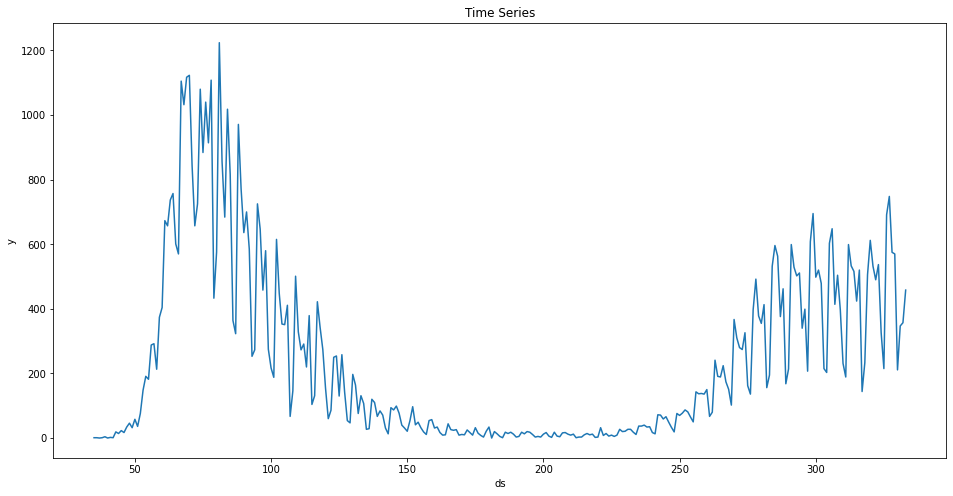

In [7]:
import matplotlib.pyplot as plt

uk_newdeath['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Split time series

In [8]:
month = '2021-01'

test = pd.DataFrame({
    'date': pd.date_range(
        start = pd.Timestamp(month),                        
        end = pd.Timestamp(month) + pd.offsets.MonthEnd(0),
        freq = 'D'
    )
})
test

,date
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
5,2021-01-06
6,2021-01-07
7,2021-01-08
8,2021-01-09
9,2021-01-10


In [9]:
test['new_case'] = uk_newdeath.add1.max()
test

,date,new_case
0,2021-01-01,53275.0
1,2021-01-02,53275.0
2,2021-01-03,53275.0
3,2021-01-04,53275.0
4,2021-01-05,53275.0
5,2021-01-06,53275.0
6,2021-01-07,53275.0
7,2021-01-08,53275.0
8,2021-01-09,53275.0
9,2021-01-10,53275.0


In [10]:
test.rename(columns={'date':'ds', 'new_case': 'add1'}, inplace=True)
test

,ds,add1
0,2021-01-01,53275.0
1,2021-01-02,53275.0
2,2021-01-03,53275.0
3,2021-01-04,53275.0
4,2021-01-05,53275.0
5,2021-01-06,53275.0
6,2021-01-07,53275.0
7,2021-01-08,53275.0
8,2021-01-09,53275.0
9,2021-01-10,53275.0


In [11]:
X_train = uk_newdeath.loc[uk_newdeath["ds"]<"2020-12-15"]
X_val  = uk_newdeath.loc[uk_newdeath["ds"]>="2020-12-15"]
X_test = test.loc[test["ds"]>="2021-01-01"]

FB Prophet

In [12]:
from fbprophet import Prophet

model = Prophet()
model.add_regressor('add1')
model.fit(X_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Predict on validation set

In [13]:
forecast = model.predict(X_val.drop(columns="y"))
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-15,-46.509671,94.851463,603.992814,-46.509671,-46.509671,310.130667,310.130667,310.130667,398.033284,398.033284,398.033284,310.130667,310.130667,310.130667,87.902617,87.902617,87.902617,0.0,0.0,0.0,351.523613
1,2020-12-16,-47.533689,214.264186,727.172874,-47.533689,-47.533689,484.547506,484.547506,484.547506,536.106952,536.106952,536.106952,484.547506,484.547506,484.547506,51.559446,51.559446,51.559446,0.0,0.0,0.0,488.573263
2,2020-12-17,-48.557707,445.446833,984.987675,-48.557739,-48.529583,749.683905,749.683905,749.683905,758.302523,758.302523,758.302523,749.683905,749.683905,749.683905,8.618618,8.618618,8.618618,0.0,0.0,0.0,709.744816
3,2020-12-18,-49.581725,290.069293,792.612266,-49.648265,-49.465892,569.022160,569.022160,569.022160,596.182780,596.182780,596.182780,569.022160,569.022160,569.022160,27.160619,27.160619,27.160619,0.0,0.0,0.0,546.601055
4,2020-12-19,-50.605743,220.509402,747.612427,-50.779021,-50.379764,535.050911,535.050911,535.050911,537.448615,537.448615,537.448615,535.050911,535.050911,535.050911,2.397703,2.397703,2.397703,0.0,0.0,0.0,486.842872
5,2020-12-20,-51.629760,347.840423,889.371378,-51.905393,-51.276236,763.987589,763.987589,763.987589,671.810289,671.810289,671.810289,763.987589,763.987589,763.987589,-92.177299,-92.177299,-92.177299,0.0,0.0,0.0,620.180529
6,2020-12-21,-52.653778,304.971397,814.781574,-53.081378,-52.101068,697.470277,697.470277,697.470277,612.008572,612.008572,612.008572,697.470277,697.470277,697.470277,-85.461705,-85.461705,-85.461705,0.0,0.0,0.0,559.354794
7,2020-12-22,-53.677796,575.683177,1075.012797,-54.276354,-52.915425,785.935451,785.935451,785.935451,873.838069,873.838069,873.838069,785.935451,785.935451,785.935451,87.902617,87.902617,87.902617,0.0,0.0,0.0,820.160273
8,2020-12-23,-54.701814,592.138640,1098.670421,-55.533281,-53.708180,849.576479,849.576479,849.576479,901.135925,901.135925,901.135925,849.576479,849.576479,849.576479,51.559446,51.559446,51.559446,0.0,0.0,0.0,846.434111
9,2020-12-24,-55.725832,527.927640,1040.694567,-56.758940,-54.539634,843.383398,843.383398,843.383398,852.002017,852.002017,852.002017,843.383398,843.383398,843.383398,8.618618,8.618618,8.618618,0.0,0.0,0.0,796.276185


In [14]:
# Calculating the RMSE of the model
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(X_val['y'], forecast['yhat'])) 
print(rms)

302.79649294284


In [15]:
forecast.yhat[forecast.yhat < 0] = 0

df_val=pd.DataFrame({'actual': X_val.y.values, 'predicted': forecast.yhat.values.astype(int)})
df_val.reset_index(drop=True, inplace=True)
df_val

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,actual,predicted
0,506.0,351
1,612.0,488
2,532.0,709
3,490.0,546
4,537.0,486
5,326.0,620
6,215.0,559
7,691.0,820
8,748.0,846
9,575.0,796


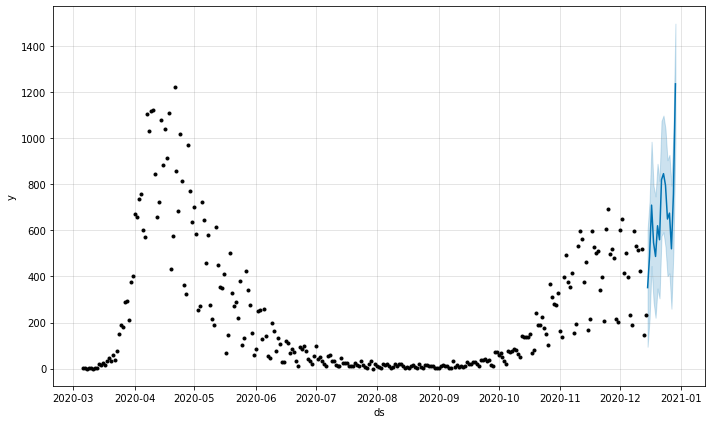

In [16]:
fig1 = model.plot(forecast)

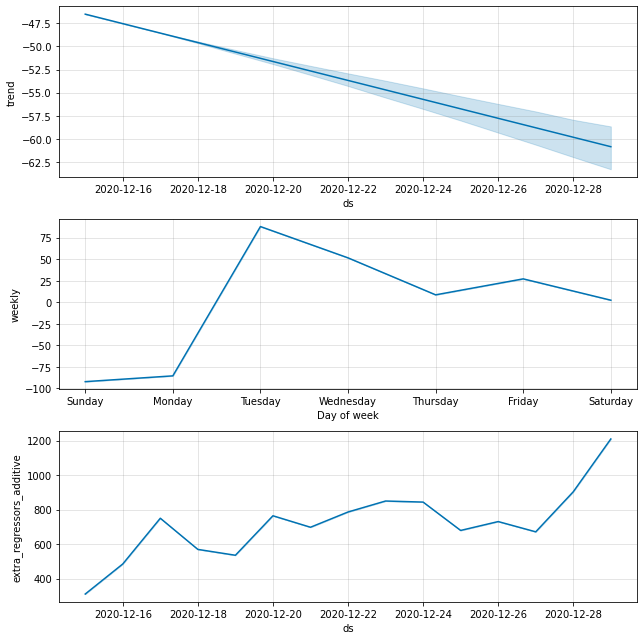

In [17]:
fig2 = model.plot_components(forecast)

In [18]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [19]:
plot_components_plotly(model, forecast)

Predict on test set

In [20]:
prediction = model.predict(X_test)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,-63.917974,902.892069,1425.374052,-66.936530,-60.662570,1209.44887,1209.44887,1209.44887,1236.609490,1236.609490,1236.609490,1209.44887,1209.44887,1209.44887,27.160619,27.160619,27.160619,0.0,0.0,0.0,1172.691515
1,2021-01-02,-64.941992,894.822045,1413.945625,-68.271262,-61.370631,1209.44887,1209.44887,1209.44887,1211.846574,1211.846574,1211.846574,1209.44887,1209.44887,1209.44887,2.397703,2.397703,2.397703,0.0,0.0,0.0,1146.904582
2,2021-01-03,-65.966010,784.866883,1303.571281,-69.634436,-62.041171,1209.44887,1209.44887,1209.44887,1117.271571,1117.271571,1117.271571,1209.44887,1209.44887,1209.44887,-92.177299,-92.177299,-92.177299,0.0,0.0,0.0,1051.305561
3,2021-01-04,-66.990027,802.528682,1319.130708,-70.909803,-62.672212,1209.44887,1209.44887,1209.44887,1123.987165,1123.987165,1123.987165,1209.44887,1209.44887,1209.44887,-85.461705,-85.461705,-85.461705,0.0,0.0,0.0,1056.997138
4,2021-01-05,-68.014045,960.403143,1480.655125,-72.354040,-63.304432,1209.44887,1209.44887,1209.44887,1297.351488,1297.351488,1297.351488,1209.44887,1209.44887,1209.44887,87.902617,87.902617,87.902617,0.0,0.0,0.0,1229.337442
5,2021-01-06,-69.038063,939.744347,1442.928278,-73.647881,-63.941604,1209.44887,1209.44887,1209.44887,1261.008316,1261.008316,1261.008316,1209.44887,1209.44887,1209.44887,51.559446,51.559446,51.559446,0.0,0.0,0.0,1191.970253
6,2021-01-07,-70.062081,880.280285,1414.433862,-74.953949,-64.521518,1209.44887,1209.44887,1209.44887,1218.067488,1218.067488,1218.067488,1209.44887,1209.44887,1209.44887,8.618618,8.618618,8.618618,0.0,0.0,0.0,1148.005408
7,2021-01-08,-71.086099,913.879807,1407.637064,-76.411878,-65.174282,1209.44887,1209.44887,1209.44887,1236.609490,1236.609490,1236.609490,1209.44887,1209.44887,1209.44887,27.160619,27.160619,27.160619,0.0,0.0,0.0,1165.523391
8,2021-01-09,-72.110116,885.216775,1404.144300,-77.824266,-65.791180,1209.44887,1209.44887,1209.44887,1211.846574,1211.846574,1211.846574,1209.44887,1209.44887,1209.44887,2.397703,2.397703,2.397703,0.0,0.0,0.0,1139.736457
9,2021-01-10,-73.134134,796.274045,1302.938936,-79.278435,-66.301285,1209.44887,1209.44887,1209.44887,1117.271571,1117.271571,1117.271571,1209.44887,1209.44887,1209.44887,-92.177299,-92.177299,-92.177299,0.0,0.0,0.0,1044.137437


In [21]:
prediction.yhat[prediction.yhat < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.yhat.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-01-01,1172
1,2021-01-02,1146
2,2021-01-03,1051
3,2021-01-04,1056
4,2021-01-05,1229
5,2021-01-06,1191
6,2021-01-07,1148
7,2021-01-08,1165
8,2021-01-09,1139
9,2021-01-10,1044


In [23]:
df_out = forecast.append(prediction)
df_out

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-15,-46.509671,94.851463,603.992814,-46.509671,-46.509671,310.130667,310.130667,310.130667,398.033284,398.033284,398.033284,310.130667,310.130667,310.130667,87.902617,87.902617,87.902617,0.0,0.0,0.0,351.523613
1,2020-12-16,-47.533689,214.264186,727.172874,-47.533689,-47.533689,484.547506,484.547506,484.547506,536.106952,536.106952,536.106952,484.547506,484.547506,484.547506,51.559446,51.559446,51.559446,0.0,0.0,0.0,488.573263
2,2020-12-17,-48.557707,445.446833,984.987675,-48.557739,-48.529583,749.683905,749.683905,749.683905,758.302523,758.302523,758.302523,749.683905,749.683905,749.683905,8.618618,8.618618,8.618618,0.0,0.0,0.0,709.744816
3,2020-12-18,-49.581725,290.069293,792.612266,-49.648265,-49.465892,569.022160,569.022160,569.022160,596.182780,596.182780,596.182780,569.022160,569.022160,569.022160,27.160619,27.160619,27.160619,0.0,0.0,0.0,546.601055
4,2020-12-19,-50.605743,220.509402,747.612427,-50.779021,-50.379764,535.050911,535.050911,535.050911,537.448615,537.448615,537.448615,535.050911,535.050911,535.050911,2.397703,2.397703,2.397703,0.0,0.0,0.0,486.842872
5,2020-12-20,-51.629760,347.840423,889.371378,-51.905393,-51.276236,763.987589,763.987589,763.987589,671.810289,671.810289,671.810289,763.987589,763.987589,763.987589,-92.177299,-92.177299,-92.177299,0.0,0.0,0.0,620.180529
6,2020-12-21,-52.653778,304.971397,814.781574,-53.081378,-52.101068,697.470277,697.470277,697.470277,612.008572,612.008572,612.008572,697.470277,697.470277,697.470277,-85.461705,-85.461705,-85.461705,0.0,0.0,0.0,559.354794
7,2020-12-22,-53.677796,575.683177,1075.012797,-54.276354,-52.915425,785.935451,785.935451,785.935451,873.838069,873.838069,873.838069,785.935451,785.935451,785.935451,87.902617,87.902617,87.902617,0.0,0.0,0.0,820.160273
8,2020-12-23,-54.701814,592.138640,1098.670421,-55.533281,-53.708180,849.576479,849.576479,849.576479,901.135925,901.135925,901.135925,849.576479,849.576479,849.576479,51.559446,51.559446,51.559446,0.0,0.0,0.0,846.434111
9,2020-12-24,-55.725832,527.927640,1040.694567,-56.758940,-54.539634,843.383398,843.383398,843.383398,852.002017,852.002017,852.002017,843.383398,843.383398,843.383398,8.618618,8.618618,8.618618,0.0,0.0,0.0,796.276185


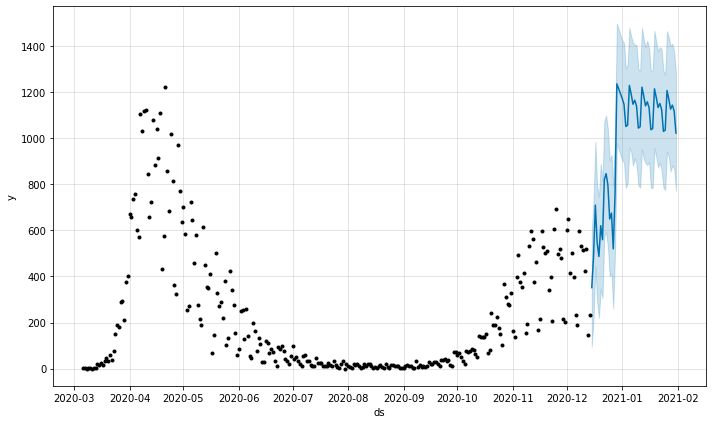

In [24]:
fig1 = model.plot(df_out)

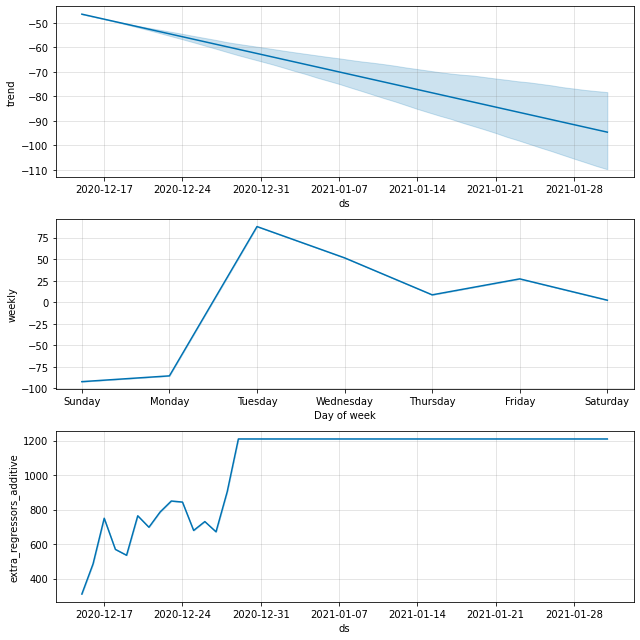

In [25]:
fig2 = model.plot_components(df_out)

In [26]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, df_out)

In [27]:
plot_components_plotly(model, df_out)

Statsmodels

Naive approach

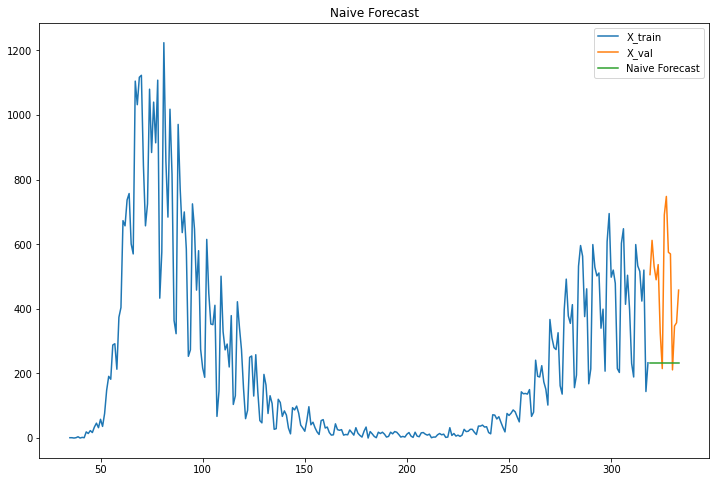

In [28]:
#naive approach
dd= np.asarray(X_train.y) 
y_hat = X_val.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [29]:
y_hat

,index,ds,add1,y,naive
319,53936,2020-12-15,18569.0,506.0,233.0
320,53937,2020-12-16,25300.0,612.0,233.0
321,53938,2020-12-17,35532.0,532.0,233.0
322,53939,2020-12-18,28560.0,490.0,233.0
323,53940,2020-12-19,27249.0,537.0,233.0
324,53941,2020-12-20,36084.0,326.0,233.0
325,53942,2020-12-21,33517.0,215.0,233.0
326,53943,2020-12-22,36931.0,691.0,233.0
327,53944,2020-12-23,39387.0,748.0,233.0
328,53945,2020-12-24,39148.0,575.0,233.0


In [30]:
# calculating RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(X_val.y, y_hat.naive)) 
print(rms)

289.82891505162144


Moving Average

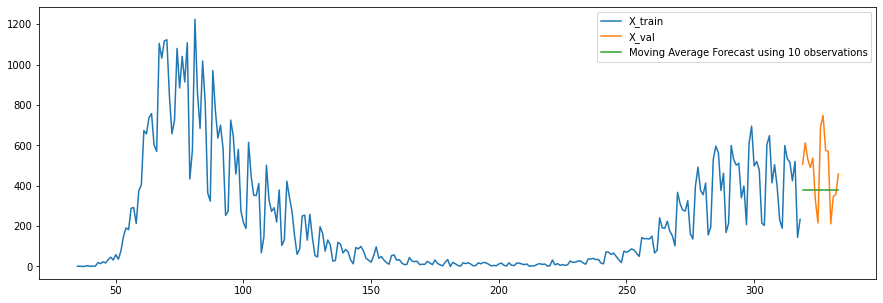

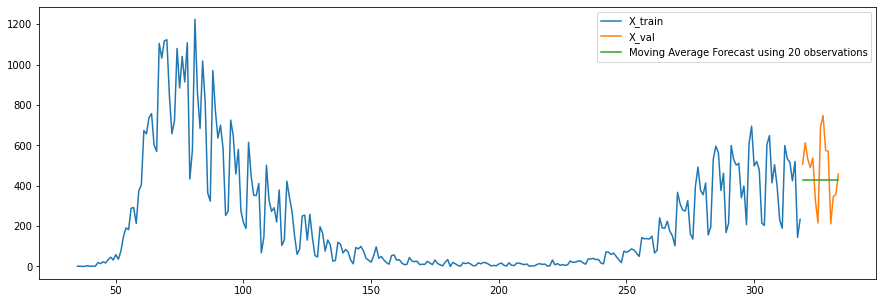

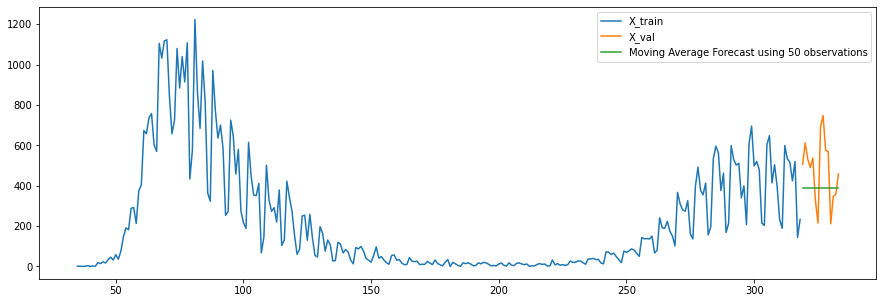

In [31]:
#moving average
# Considering rolling mean for last 10, 20, 50 days and visualize the results.
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 
y_hat_avg = X_val.copy() 
y_hat_avg['moving_avg_forecast'] = X_train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(X_train['y'], label='X_train') 
plt.plot(X_val['y'], label='X_val') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [32]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_hat_avg.moving_avg_forecast)) 
print(rms)

177.66751269342032


In [33]:
train = X_train.append(X_val)
train

,index,ds,add1,y
0,53617,2020-01-31,2.0,NaN
1,53618,2020-02-01,0.0,NaN
2,53619,2020-02-02,0.0,NaN
3,53620,2020-02-03,6.0,NaN
4,53621,2020-02-04,0.0,NaN
...,...,...,...,...
329,53946,2020-12-25,32803.0,570.0
330,53947,2020-12-26,34788.0,211.0
331,53948,2020-12-27,32493.0,347.0
332,53949,2020-12-28,41460.0,357.0


In [34]:
#predict on X_test
y_hat_avg = X_test.copy()
y_hat_avg['moving_avg_forecast'] = train['y'].rolling(50).mean().iloc[-1] # average of last 50 observations
y_hat_avg

,ds,add1,moving_avg_forecast
0,2021-01-01,53275.0,446.92
1,2021-01-02,53275.0,446.92
2,2021-01-03,53275.0,446.92
3,2021-01-04,53275.0,446.92
4,2021-01-05,53275.0,446.92
5,2021-01-06,53275.0,446.92
6,2021-01-07,53275.0,446.92
7,2021-01-08,53275.0,446.92
8,2021-01-09,53275.0,446.92
9,2021-01-10,53275.0,446.92


In [35]:
X_val.index.max()

333

In [36]:
list_num = []
index = X_val.index.max()
for i in range(len(X_test)):
  index = index + 1
  list_num.append(index)
list_num

[334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364]

In [37]:
X_test['index'] = list_num
X_test

,ds,add1,index
0,2021-01-01,53275.0,334
1,2021-01-02,53275.0,335
2,2021-01-03,53275.0,336
3,2021-01-04,53275.0,337
4,2021-01-05,53275.0,338
5,2021-01-06,53275.0,339
6,2021-01-07,53275.0,340
7,2021-01-08,53275.0,341
8,2021-01-09,53275.0,342
9,2021-01-10,53275.0,343


In [38]:
y_hat_avg['index'] = list_num
y_hat_avg

,ds,add1,moving_avg_forecast,index
0,2021-01-01,53275.0,446.92,334
1,2021-01-02,53275.0,446.92,335
2,2021-01-03,53275.0,446.92,336
3,2021-01-04,53275.0,446.92,337
4,2021-01-05,53275.0,446.92,338
5,2021-01-06,53275.0,446.92,339
6,2021-01-07,53275.0,446.92,340
7,2021-01-08,53275.0,446.92,341
8,2021-01-09,53275.0,446.92,342
9,2021-01-10,53275.0,446.92,343


In [39]:
y_hat_avg.set_index(['index'], inplace=True)
y_hat_avg

,ds,add1,moving_avg_forecast
index,,,
334,2021-01-01,53275.0,446.92
335,2021-01-02,53275.0,446.92
336,2021-01-03,53275.0,446.92
337,2021-01-04,53275.0,446.92
338,2021-01-05,53275.0,446.92
339,2021-01-06,53275.0,446.92
340,2021-01-07,53275.0,446.92
341,2021-01-08,53275.0,446.92
342,2021-01-09,53275.0,446.92


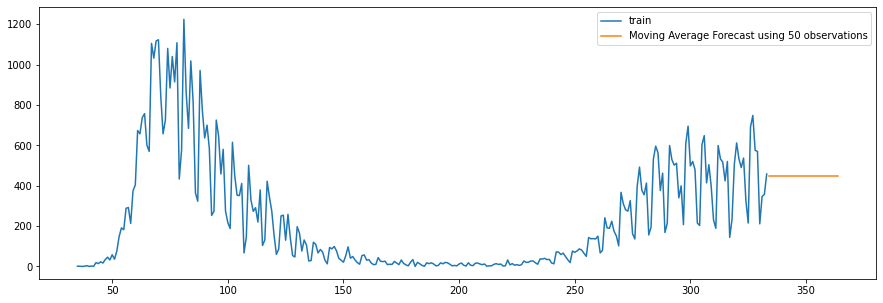

In [40]:
plt.figure(figsize=(15,5)) 
plt.plot(train['y'], label='train') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [41]:
#select last column from array
y_hat_avg.iloc[:,-1:] = y_hat_avg.iloc[:,-1:].astype(int)
print(y_hat_avg.iloc[:,-1:])

       moving_avg_forecast
index                     
334                    446
335                    446
336                    446
337                    446
338                    446
339                    446
340                    446
341                    446
342                    446
343                    446
344                    446
345                    446
346                    446
347                    446
348                    446
349                    446
350                    446
351                    446
352                    446
353                    446
354                    446
355                    446
356                    446
357                    446
358                    446
359                    446
360                    446
361                    446
362                    446
363                    446
364                    446


In [42]:
prediction = y_hat_avg.moving_avg_forecast

prediction[prediction < 0] = 0

output = pd.DataFrame({'date': test.ds, 'new_death': prediction.values.astype(int)})
output.to_csv('p_new_death.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
#upload submission
p_new_death = pd.read_csv("p_new_death.csv")
p_new_death

,date,new_death
0,2021-01-01,446
1,2021-01-02,446
2,2021-01-03,446
3,2021-01-04,446
4,2021-01-05,446
5,2021-01-06,446
6,2021-01-07,446
7,2021-01-08,446
8,2021-01-09,446
9,2021-01-10,446


Vector Auto Regression VAR

In [44]:
X_train = X_train.drop(['ds'],axis=1)
X_train

,index,add1,y
0,53617,2.0,NaN
1,53618,0.0,NaN
2,53619,0.0,NaN
3,53620,6.0,NaN
4,53621,0.0,NaN
...,...,...,...
314,53931,21066.0,516.0
315,53932,21784.0,424.0
316,53933,21554.0,520.0
317,53934,18541.0,144.0


In [45]:
X_train.fillna(0,inplace=True)
X_train

,index,add1,y
0,53617,2.0,0.0
1,53618,0.0,0.0
2,53619,0.0,0.0
3,53620,6.0,0.0
4,53621,0.0,0.0
...,...,...,...
314,53931,21066.0,516.0
315,53932,21784.0,424.0
316,53933,21554.0,520.0
317,53934,18541.0,144.0


In [46]:
X_val = X_val.drop(['ds'],axis=1)
X_val

,index,add1,y
319,53936,18569.0,506.0
320,53937,25300.0,612.0
321,53938,35532.0,532.0
322,53939,28560.0,490.0
323,53940,27249.0,537.0
324,53941,36084.0,326.0
325,53942,33517.0,215.0
326,53943,36931.0,691.0
327,53944,39387.0,748.0
328,53945,39148.0,575.0


In [47]:
X_test = X_test.drop(['ds'],axis=1)
X_test

,add1,index
0,53275.0,334
1,53275.0,335
2,53275.0,336
3,53275.0,337
4,53275.0,338
5,53275.0,339
6,53275.0,340
7,53275.0,341
8,53275.0,342
9,53275.0,343


In [48]:
from statsmodels.tsa.vector_ar.var_model import VAR

start_index = X_val.index.min()
end_index = X_val.index.max()

# fit model
model = VAR(X_train)
model_fit = model.fit()
# make prediction
yhat = model_fit.forecast(model_fit.y, steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



[[53935 20239   242]
 [53936 20120   250]
 [53937 20015   256]
 [53938 19923   261]
 [53939 19844   264]
 [53940 19774   267]
 [53941 19715   269]
 [53942 19663   270]
 [53943 19620   270]
 [53944 19583   270]
 [53945 19553   270]
 [53946 19529   270]
 [53947 19509   269]
 [53948 19495   268]
 [53949 19486   267]]


/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [49]:
index = yhat[:,0]

In [50]:
y_pred = yhat[:,2]

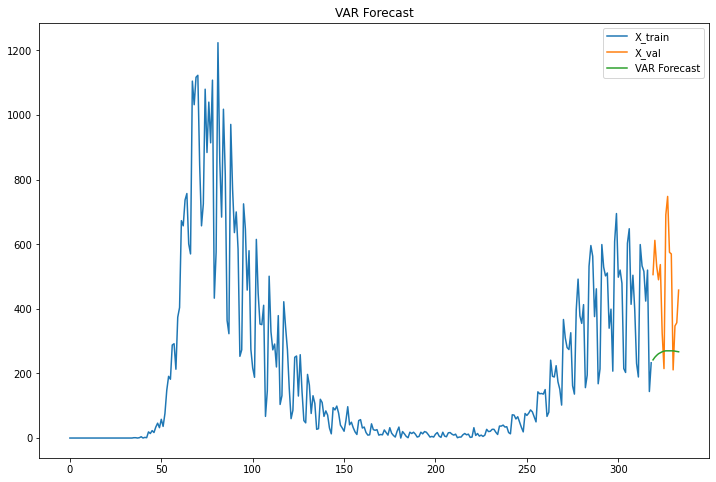

In [51]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,y_pred, label='VAR Forecast') 
plt.legend(loc='best') 
plt.title("VAR Forecast") 
plt.show()

In [52]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, y_pred)) 
print(rms)

264.9528259898354


Vector Moving Average

In [53]:
from statsmodels.tsa.statespace.varmax import VARMAX

model = VARMAX(X_train, order=(0,1))
model_fit = model.fit(disp=False)
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
yhat

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,index,add1,y
319,53798,10484,500
320,53776,5877,202
321,53776,5877,202
322,53776,5877,202
323,53776,5877,202
324,53776,5877,202
325,53776,5877,202
326,53776,5877,202
327,53776,5877,202
328,53776,5877,202


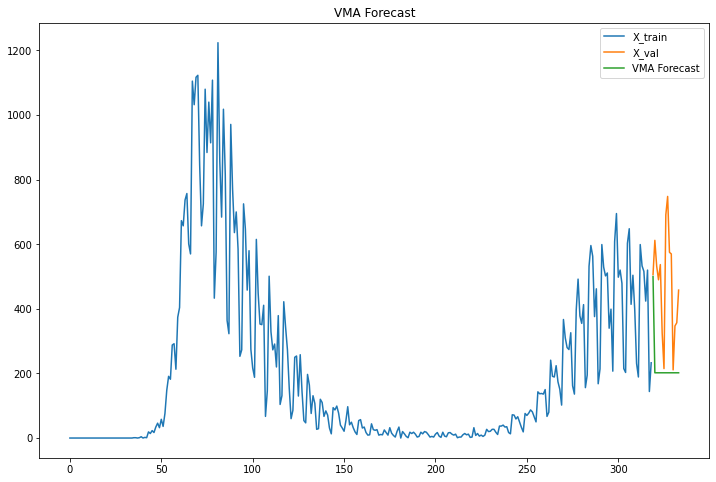

In [54]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VMA Forecast') 
plt.legend(loc='best') 
plt.title("VMA Forecast") 
plt.show()

In [55]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

306.61669882770576


Vector Autoregression Moving-Average (VARMA)

In [56]:
from statsmodels.tsa.statespace.varmax import VARMAX

# fit model
model = VARMAX(X_train, order=(1, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(steps=len(X_val))
yhat = yhat.astype(int)
print(yhat)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:379: UserWarning:

Non-stationary starting moving-average parameters found. Using zeros as starting parameters.



     index   add1    y
319  53935  20180  242
320  53935  20000  249
321  53935  19834  255
322  53935  19681  259
323  53934  19539  263
324  53934  19408  265
325  53934  19285  266
326  53934  19170  267
327  53934  19062  268
328  53934  18961  268
329  53934  18866  267
330  53934  18777  267
331  53934  18693  266
332  53934  18613  265
333  53934  18538  264


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.



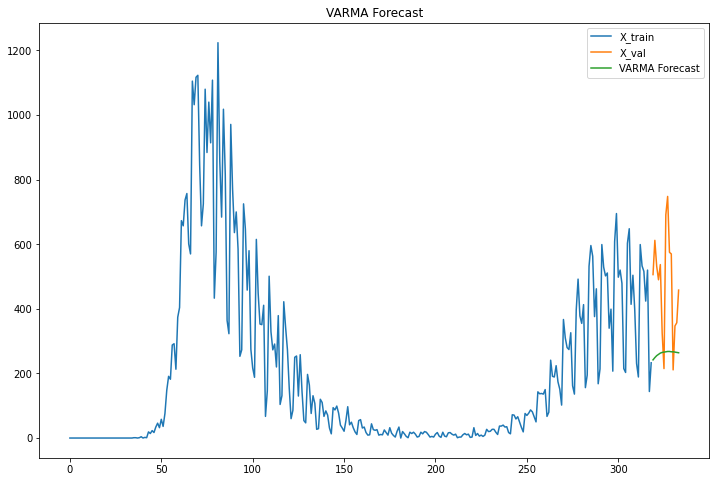

In [57]:
plt.figure(figsize=(12,8)) 
plt.plot(X_train.index, X_train['y'], label='X_train') 
plt.plot(X_val.index,X_val['y'], label='X_val') 
plt.plot(X_val.index,yhat.y, label='VARMA Forecast') 
plt.legend(loc='best') 
plt.title("VARMA Forecast") 
plt.show()

In [58]:
# RMSE value for Moving Average 
rms = sqrt(mean_squared_error(X_val.y, yhat.y)) 
print(rms)

266.4562503176334
